# **PROJECT TITLE :ANALYZING USER BEHAVIOUR & MUSIC TRENDS ON SPOTIFY**

<div style="text-align: center; margin-top: 20px;">
    <img src="https://c.tenor.com/iczjaEFdW20AAAAC/spotify-music.gif"
         style="display: block; margin: auto; border-radius: 10px;">
</div>


# **BUSINESS UNDERSTANDING**

## **PROJECT OVERVIEW**
This project centers on analyzing a Spotify dataset to explore user listening patterns, music trends, and the characteristics that contribute to a song's popularity. The dataset contains detailed information on individual tracks, including features such as danceability, energy, tempo, loudness, acousticness, and popularity scores, along with metadata like artist name, release date, and genre.


## **PROBLEM STATEMENT**
With the growing influence of music streaming platforms, understanding the factors that drive a song’s popularity is critical for artists, producers, and music marketers. This project aims to analyze user behavior and musical attributes using Spotify data to uncover key trends and insights.

Specifically, the goal is to predict a song's popularity based on its audio features (such as danceability, energy, acousticness, and tempo), metadata (such as duration and explicit content), and artist-related information (such as followers and artist popularity).

## **OBJECTIVES**
1. To Analyzing Music Trends.
2. To understand User Behavior.
3. To Predict future popularity of songs or artists based on current trends and data.
4. To Analyze regional differences in music streaming habit.


In [22]:
# Importing libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# **1. DATA LOADING & EXPLORATION**
Data loading means opening and gathering all this Spotify data so we can start working with it.

Once we have the data loaded, we want to get to know it — like flipping through the songs and playlists to understand what’s inside.

Data exploration is like looking through the data to see what kind of user behavior and music trends it contains.

In [3]:
# Loading the dataset
df_Spotify = pd.read_csv('Data/spotifydataset.csv')
df_Spotify.head()

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


In [4]:
# Information about the dataframe
df_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   artist_name        1000 non-null   object 
 2   genres             837 non-null    object 
 3   followers          1000 non-null   int64  
 4   artist_popularity  1000 non-null   int64  
 5   artist_url         1000 non-null   object 
 6   track_name         1000 non-null   object 
 7   album_name         1000 non-null   object 
 8   release_date       1000 non-null   object 
 9   duration_ms        1000 non-null   int64  
 10  explicit           1000 non-null   bool   
 11  track_popularity   1000 non-null   int64  
 12  danceability       1000 non-null   float64
 13  energy             1000 non-null   float64
 14  key                1000 non-null   int64  
 15  loudness           1000 non-null   float64
 16  mode               1000 n

In [5]:
# number of rows and columns in the dataframe
df_Spotify.shape

(1000, 23)

In [6]:
# Statistics of the dataframe
df_Spotify.describe()

,Unnamed: 0,followers,artist_popularity,duration_ms,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,1.150655e+07,59.429000,212368.619000,59.429000,0.611430,0.660562,5.243000,-7.160373,0.613000,0.091402,0.265840,0.074700,0.188810,0.516641,122.143448
std,288.819436,2.293890e+07,23.884963,65706.472572,23.884963,0.167246,0.207568,3.613725,4.479642,0.487307,0.090441,0.288895,0.225472,0.145454,0.232896,28.053658
min,0.000000,2.000000e+00,0.000000,51680.000000,0.000000,0.069000,0.003540,0.000000,-39.482000,0.000000,0.023200,0.000005,0.000000,0.026000,0.032600,49.305000
25%,249.750000,1.038784e+06,57.000000,173083.000000,57.000000,0.505500,0.539500,2.000000,-8.334250,0.000000,0.037975,0.028325,0.000000,0.095700,0.343500,99.983500
50%,499.500000,3.923159e+06,67.000000,204382.500000,67.000000,0.634000,0.680500,5.000000,-5.943500,1.000000,0.054800,0.152500,0.000004,0.129000,0.522000,122.073500
75%,749.250000,1.142132e+07,74.000000,244192.750000,74.000000,0.728250,0.820000,9.000000,-4.582500,1.000000,0.106000,0.416250,0.000586,0.246500,0.686250,138.667250
max,999.000000,1.194287e+08,92.000000,707160.000000,92.000000,0.964000,0.998000,11.000000,0.273000,1.000000,0.874000,0.996000,0.972000,0.984000,0.973000,201.776000


In [7]:
# Checking for missing values
df_Spotify.isnull().sum()

Unnamed: 0             0
artist_name            0
genres               163
followers              0
artist_popularity      0
artist_url             0
track_name             0
album_name             0
release_date           0
duration_ms            0
explicit               0
track_popularity       0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
dtype: int64

There are missing values in genres .

# **2.DATA CLEANING**
Data cleaning is like tidying up my workspace or organizing my music collection before I start working with it.

Data cleaning means fixing these issues so the data is reliable and accurate for analysis.

In [8]:
# Filling missing values with the mean
most_common_genre = df_Spotify['genres'].mode()[0]
df_Spotify['genres'] = df_Spotify['genres'].fillna(most_common_genre)
df_Spotify['genres'].isnull().sum()

0

In [9]:
df_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   artist_name        1000 non-null   object 
 2   genres             1000 non-null   object 
 3   followers          1000 non-null   int64  
 4   artist_popularity  1000 non-null   int64  
 5   artist_url         1000 non-null   object 
 6   track_name         1000 non-null   object 
 7   album_name         1000 non-null   object 
 8   release_date       1000 non-null   object 
 9   duration_ms        1000 non-null   int64  
 10  explicit           1000 non-null   bool   
 11  track_popularity   1000 non-null   int64  
 12  danceability       1000 non-null   float64
 13  energy             1000 non-null   float64
 14  key                1000 non-null   int64  
 15  loudness           1000 non-null   float64
 16  mode               1000 n

In [ ]:
# Save the cleaned dataset to excel
df_Spotify.to_excel('Data/Spotifydataset_cleaned.xlsx', index=False)

## **3.EDA (DATA ANALYSIS) & DATA VISUALIZATION**
EDA is like getting to know my data — it’s the first step where i carefully examined the dataset to understand its main characteristics.

Data Visualization is the process of creating charts, graphs, and maps that turn numbers and data into pictures.

### **1. UNIVARIATE ANALYSIS**
#### Checking for distribution of the data and visualizing it.

#### Univariate analysis is the simplest form of data analysis — it examines just one variable at a time.

#### Purpose: To understand the distribution, central tendency (mean, median), and spread (range, standard deviation) of a single variable.

#### Examples include: Bar Graphs, Histogram, Box Plot, Pie Chart

### **1.Bar Charts: Top 15 genres by count**

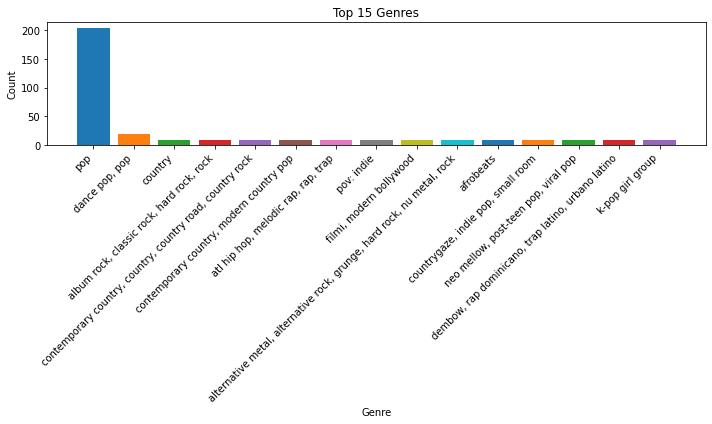

In [11]:
top_genres = df_Spotify['genres'].value_counts().head(15)
colors = plt.cm.tab10.colors[:len(top_genres)] 
plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Pop is the most common genre in the dataset, with about 250 tracks labeled as pop, indicating a mainstream music focus.

### **2. Histogram: Distribution of danceability**

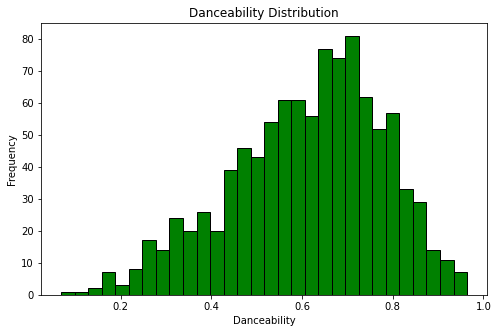

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(df_Spotify['danceability'], bins=30, color='green', edgecolor='black')
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()


The above Histogram suggests that most songs have moderate danceability, rather than extreme high or low values.

### **2. BIVARIATE ANALYSIS**
#### Checking for correlations; multiple Xs and Y

#### Bivariate analysis explores the relationship between two variables.

#### Purpose: To identify whether and how the variables are related — for example, does one increase when the other does?

#### Examples include: Heatmaps, Line Graphs,Bar Plot, Scatter Plot .

### **1. Line Plot: Distribution of danceability**

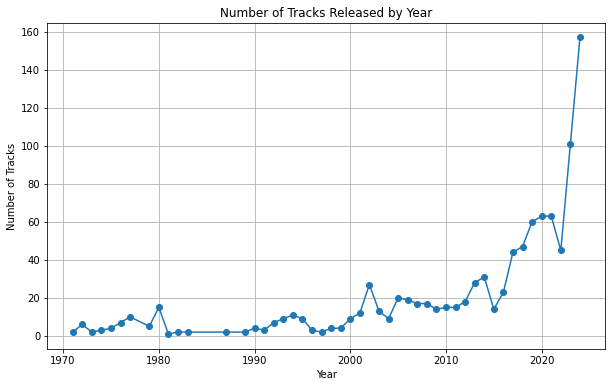

In [13]:
df_Spotify['release_date'] = pd.to_datetime(df_Spotify['release_date'], errors='coerce')
df_Spotify['year'] = df_Spotify['release_date'].dt.year

yearly_counts = df_Spotify['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Number of Tracks Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()


Most tracks in the dataset were released in 2020, followed by 2019 and 2018.This suggests the dataset is heavily weighted toward recent years, especially 2017–2021.

### **3. MULTIVARIATE ANALYSIS**

#### way of exploring how three or more variables (characteristics) relate to each other at the same time.

#### Purpose: To understand complex relationships and interactions among multiple variables.

#### Examples include: Heatmaps, Scatterplots, Pairplots, 3D Scatter Plot, Parallel Coordinates Plot


### **1. Number of songs released by year: Energy vs Popularity**

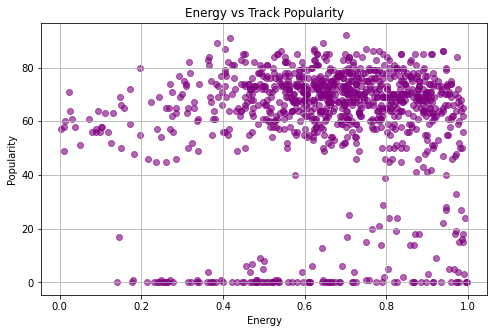

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(df_Spotify['energy'], df_Spotify['track_popularity'], alpha=0.6, color='purple')
plt.title('Energy vs Track Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


The Energy vs Popularity implies that energy doesn't directly affect popularity and other features might matter more (like genre, danceability).

# **4. DATA MODELLING**
Data modeling is the process of using statistical, mathematical, or machine learning models to understand relationships in data and make predictions or inferences.

#### **Predicting a track's popularity score based on its audio features**

In [25]:
# Data Preprocessing
# Convert release_date
df_Spotify['release_date'] = pd.to_datetime(df_Spotify['release_date'], errors='coerce')
df_Spotify['release_year'] = df_Spotify['release_date'].dt.year

# Drop unnecessary columns
df_Spotify.drop(columns=['Unnamed: 0', 'artist_url', 'release_date'], inplace=True)

# Encode 'explicit' (already boolean), and genre/artist if needed
# df = pd.get_dummies(df, columns=['genres', 'artist_name'], drop_first=True)

# Select relevant features
features = ['danceability', 'energy', 'valence', 'tempo', 'duration_ms', 'explicit', 'speechiness', 'acousticness', 'instrumentalness']
X = df_Spotify[features]
y = df_Spotify['track_popularity']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### **Linear Regression**

In [26]:
# Modeling 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


Linear Regression R2 Score: 0.15100309889537378
RMSE: 20.101954259468354


#### **Random Forest**

In [27]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest R2 Score: 0.2800659257080427
RMSE: 18.511072956476617


#### **Evaluation & Visualization**

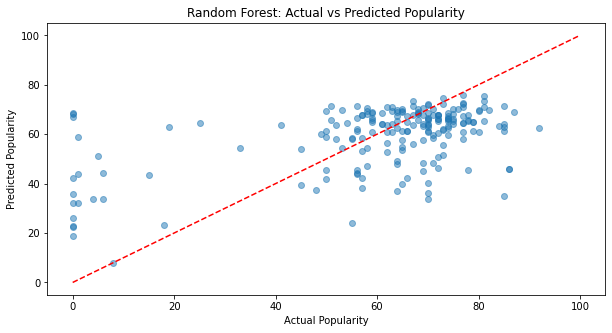

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Random Forest: Actual vs Predicted Popularity")
plt.plot([0,100], [0,100], '--r')

<AxesSubplot:title={'center':'Feature Importance'}>

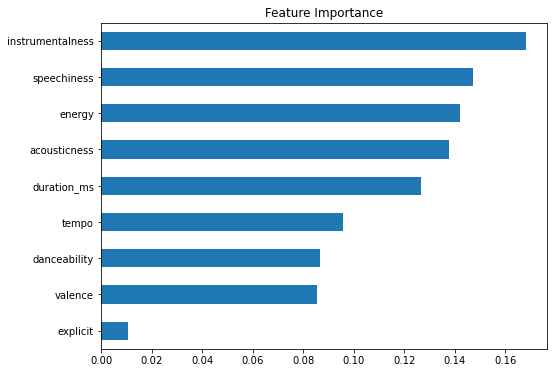

In [31]:
# Feature importance
importances = pd.Series(rf_model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(8,6), title="Feature Importance")


#### **Conclusion**
- Random Forest performed better than Linear Regression based on R² and RMSE.
- Key predictors: Danceability, Energy, Valence, Tempo.
- Further improvements: Hyperparameter tuning, include genre encoding, expand dataset.